In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder




In [2]:
# Step 1: Preprocess the dataset
df = pd.read_csv('HRdata.csv')  # Assuming the dataset is in a CSV file



In [3]:
print(df.head())

       Name  Age  Years of Experience  Salary          Role
0    ALKIRE   26                  1.0  250000  HR Assistant
1  AMBURGEY   26                  1.0  250000  HR Assistant
2       ARP   26                  1.0  250000  HR Assistant
3    BEAGLE   26                  1.0  250000  HR Assistant
4       BEN   26                  1.0  250000  HR Assistant


In [4]:
role_counts = df['Role'].value_counts()
print(role_counts)


Role
HR Manager        15511
HR Specialist      9655
HR Assistant       8818
HR Specialist        36
Name: count, dtype: int64


In [5]:
print(df['Role'].unique())
print(df['Years of Experience'].unique())


['HR Assistant' 'HR Manager' 'HR Specialist' 'HR Specialist ']
[ 1.   2.   3.   4.   4.5  3.5 10.  11.   9.5  8.5  5.   8.   7.   6.
  9.   1.5  2.5  5.5  6.5  7.5 10.5 11.5 12.5 13.5 14.5 15.5 12.  13.
 14.  15.   5.1  6.1  6.3]


In [6]:


hr_specialist_salaries = df[df['Role'] == 'HR Specialist']['Salary']
print(hr_specialist_salaries)



147       310000
148       310000
149       310000
150       310000
151       310000
          ...   
33952    6300000
33953    6300000
33954    6300000
33955    6300000
33956    6300000
Name: Salary, Length: 9655, dtype: int64


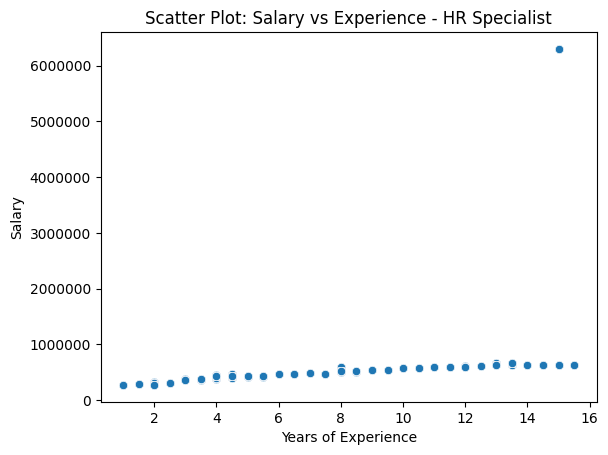

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot for HR Specialist
sns.scatterplot(data=df[df['Role'] == 'HR Specialist'], x='Years of Experience', y='Salary')

# Set the y-axis tick label format to remove shorthand notation
plt.ticklabel_format(style='plain', axis='y')

# Set labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot: Salary vs Experience - HR Specialist')

# Display the plot
plt.show()




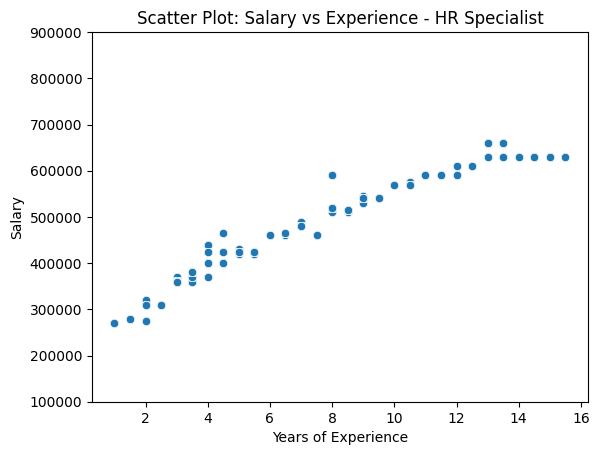

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot for HR Specialist
sns.scatterplot(data=df[df['Role'] == 'HR Specialist'], x='Years of Experience', y='Salary')

# Set the y-axis limit
plt.ylim(100000, 900000)

# Set labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot: Salary vs Experience - HR Specialist')

# Display the plot
plt.show()


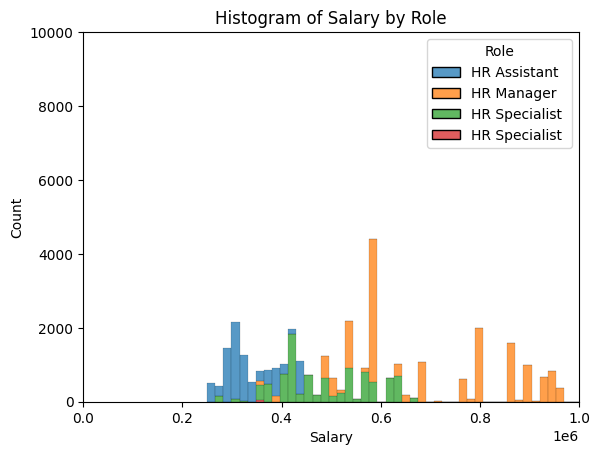

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create histogram plots for each role
sns.histplot(data=df, x='Salary', hue='Role', multiple='stack')

# Set x-axis and y-axis limits
plt.xlim(0, 1000000)  # Set the x-axis limits from 0 to 100000
plt.ylim(0, 10000)      # Set the y-axis limits from 0 to 50

# Set labels and title
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Histogram of Salary by Role')

# Display the plot
plt.show()


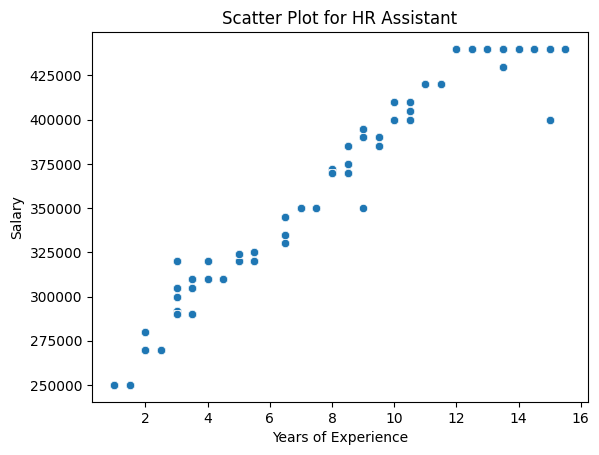

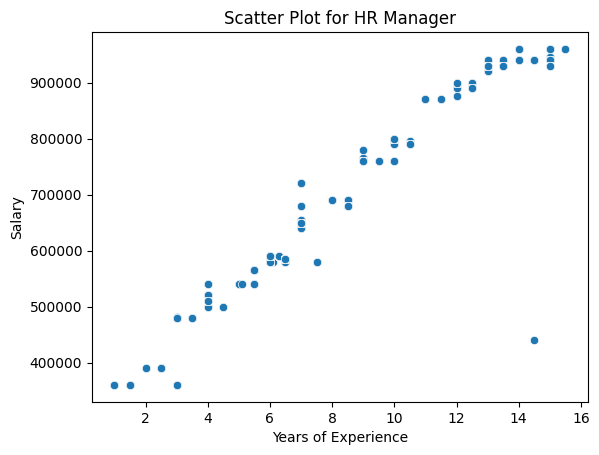

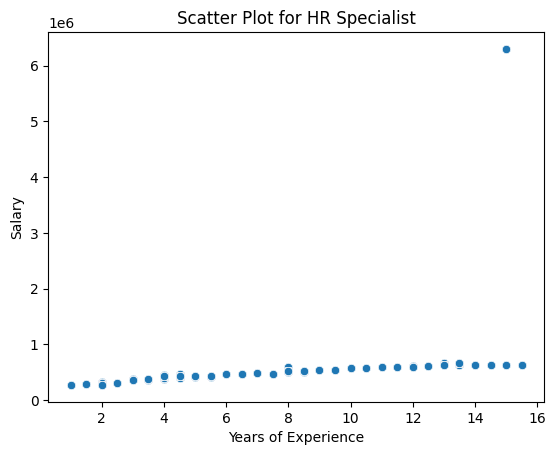

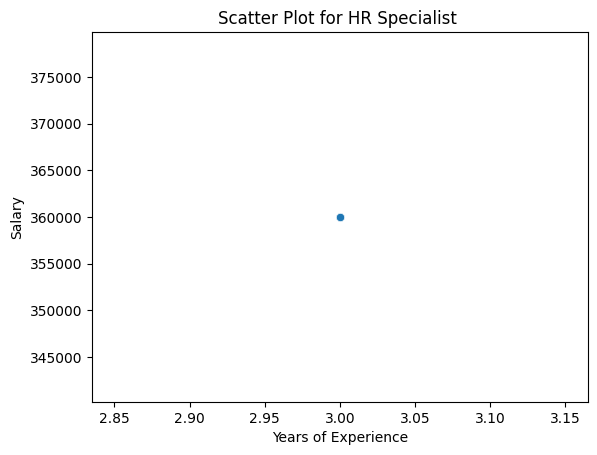

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the unique roles
unique_roles = df['Role'].unique()

# Create a separate graph for each unique role
for role in unique_roles:
    # Filter the data for the specific role
    role_data = df[df['Role'] == role]
    
    # Create scatter plot for the role
    sns.scatterplot(data=role_data, x='Years of Experience', y='Salary')
    
    # Set title
    plt.title(f'Scatter Plot for {role}')
    
    # Display the plot
    plt.show()



In [11]:
df['Role'].value_counts()




Role
HR Manager        15511
HR Specialist      9655
HR Assistant       8818
HR Specialist        36
Name: count, dtype: int64

In [12]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Role'] = label_encoder.fit_transform(df['Role'])


In [13]:
# Split the data into training and testing sets
X = df[['Role', 'Years of Experience']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [15]:

# Predict the salaries
y_pred = model.predict(X_test)



In [16]:

# Evaluate the model
score = model.score(X_test, y_test)
print("R-squared score:", score)



R-squared score: 0.3493589945812523


In [17]:
import pickle
pickle.dump(model, open('hr.pkl','wb'))
